### Code Decison Trees For Salmon And Tuna Dataset

In [18]:
# Many libraries have a good DT libraries but implementing help with maths.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('fish.csv')

In [20]:
df

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna
...,...,...,...
995,3.710186,0.956612,salmon
996,3.749596,9.557450,salmon
997,2.410087,3.355781,tuna
998,0.990773,3.812210,tuna


In [21]:
#!pip install scikit-learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])

C:\Users\arish\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


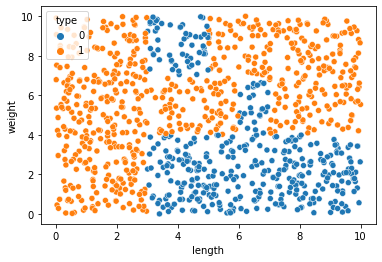

In [22]:
#!pip install seaborn
import seaborn as sns
map=sns.scatterplot(df['length'],df['weight'],hue=df['type'])

- 0 is Salmon
- 1 is Tuna

In [23]:
df

,length,weight,type
0,8.618381,7.848030,1
1,2.522046,8.762507,1
2,2.035690,7.101971,1
3,6.695008,4.953932,0
4,9.834069,7.908453,1
...,...,...,...
995,3.710186,0.956612,0
996,3.749596,9.557450,0
997,2.410087,3.355781,1
998,0.990773,3.812210,1


In [24]:
def get_entropy(vals):
    p=np.mean(vals)
    if p==0 or p==1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [25]:
#check helper function
get_entropy([0,0,1,1])

1.0

In [26]:
#second helper function
def get_entropy_from_split(df,feature,val):
    left_types=df[df[feature]<val].type
    right_types=df[df[feature]>=val].type
    
    left_entropy=get_entropy(left_types)
    right_entropy=get_entropy(right_types)
    
    left_prop=len(left_types)/len(df)
    right_prop=len(right_types)/len(df)
    return left_prop*left_entropy+right_prop*right_entropy

In [27]:
features=['length','weight']
best_params={'feature':None,'val':None,'entropy':np.inf}
for f in features:
    curr=df[f].min()
    step=0.1
    while curr<df[f].max():
        curr_entropy=get_entropy_from_split(df,f,curr)
        if curr_entropy<best_params['entropy']:
            best_params['feature']=f
            best_params['val']=curr
            best_params['entropy']=curr_entropy
        curr+=step
print(best_params) 

{'feature': 'length', 'val': 3.0065456626365483, 'entropy': 0.6843553171032571}


The first split should happen at **length = 3** let's do the split and check out the next on

In [28]:
## The first split should happen at length = 3 let's do the split and check out the next one
curr_df=df.copy()
curr_df=curr_df[(curr_df.length>3)]
features=['length','weight']
best_params={'feature':None,'val':None,'entropy':np.inf}
for f in features:
    curr=curr_df[f].min()
    step=0.1
    while curr<curr_df[f].max():
        curr_entropy=get_entropy_from_split(curr_df,f,curr)
        if curr_entropy<best_params['entropy']:
            best_params['feature']=f
            best_params['val']=curr
            best_params['entropy']=curr_entropy
        curr+=step
print(best_params) 

{'feature': 'weight', 'val': 4.001260199577321, 'entropy': 0.426763555582736}


The next split is at **weight=4** so lets do the split

In [29]:
curr_df=df.copy()
curr_df = curr_df[(curr_df.length > 3) & (curr_df.weight > 4)]
features=['length','weight']
best_params={'feature':None,'val':None,'entropy':np.inf}
for f in features:
    curr=curr_df[f].min()
    step=0.1
    while curr<curr_df[f].max():
        curr_entropy=get_entropy_from_split(curr_df,f,curr)
        if curr_entropy<best_params['entropy']:
            best_params['feature']=f
            best_params['val']=curr
            best_params['entropy']=curr_entropy
        curr+=step
print(best_params) 

{'feature': 'length', 'val': 7.008879131610914, 'entropy': 0.5524718527527053}


The next split should be at **lenght=7**

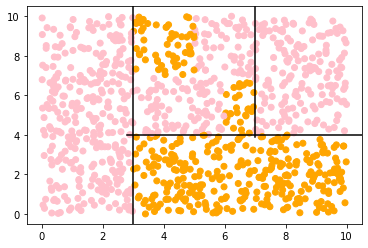

In [30]:
plt.scatter(df.length, df.weight, color=['orange' if t==0 else 'pink' for t in df.type],animated=True)
plt.axvline(x=3,color='black',animated=True)
plt.axhline(y=4,xmin=0.3,color='black',animated=True)
plt.axvline(x=7,ymin=0.4,color='black',animated=True)

Hence it becomes very clear that the bounadries predicted are somewhat able to distinguish the **Tuna and Salmon**